In [0]:
# Import the machine learning libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import re

In [181]:
# Load a dataset for car price prediction.
# The dataset can be downloaded here: https://www.kaggle.com/ashydv/car-price-prediction.
%%time
cars = pd.read_csv("./drive/My Drive/ML_Code/Car Price Prediction/CarPrice_Assignment.csv")

CPU times: user 8.89 ms, sys: 177 µs, total: 9.06 ms
Wall time: 16.3 ms


In [182]:
# Print dataset information.
%%time
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [183]:
# Print dataset header.
cars.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [184]:
cars['symboling']

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [185]:
cars['symboling'].astype('category').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

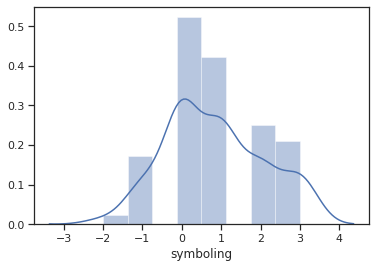

In [186]:
sns.distplot(cars['symboling'])
plt.show()

In [187]:
# drivewheel: front-wheel, rare-wheel, or four-wheel drives.
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [188]:
# aspiration: standard or turbocharging.
cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [189]:
# curbweight is the distance between the front and rare wheels.
cars['curbweight'].astype('category').value_counts()

2385    4
2275    3
1918    3
1989    3
4066    2
       ..
2800    1
2778    1
2765    1
2758    1
1488    1
Name: curbweight, Length: 171, dtype: int64

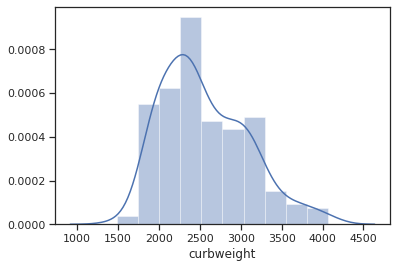

In [190]:
sns.distplot(cars['curbweight'])
plt.show()

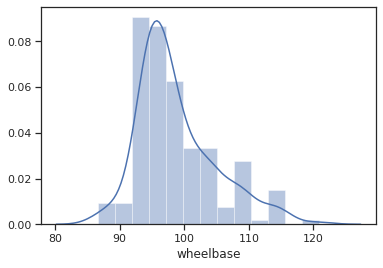

In [191]:
# wheelbase is the distance between the front and rare wheels.
sns.distplot(cars['wheelbase'])
plt.show()

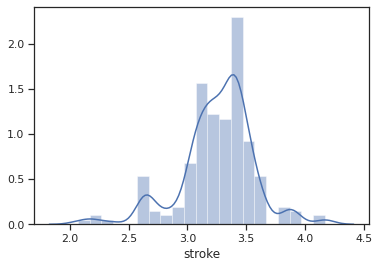

In [192]:
# stroke is the volume of the engine.
sns.distplot(cars['stroke'])
plt.show()

### **Data Exploration**


In [193]:
# Display all numeric (float and int) variables from the dataset.
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
cars_numeric.head(10)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167


In [194]:
# Drop car_ID and symboling columns.
cars_numeric = cars_numeric.drop(['car_ID'], axis=1)
cars_numeric = cars_numeric.drop(['symboling'], axis=1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 1440x720 with 0 Axes>

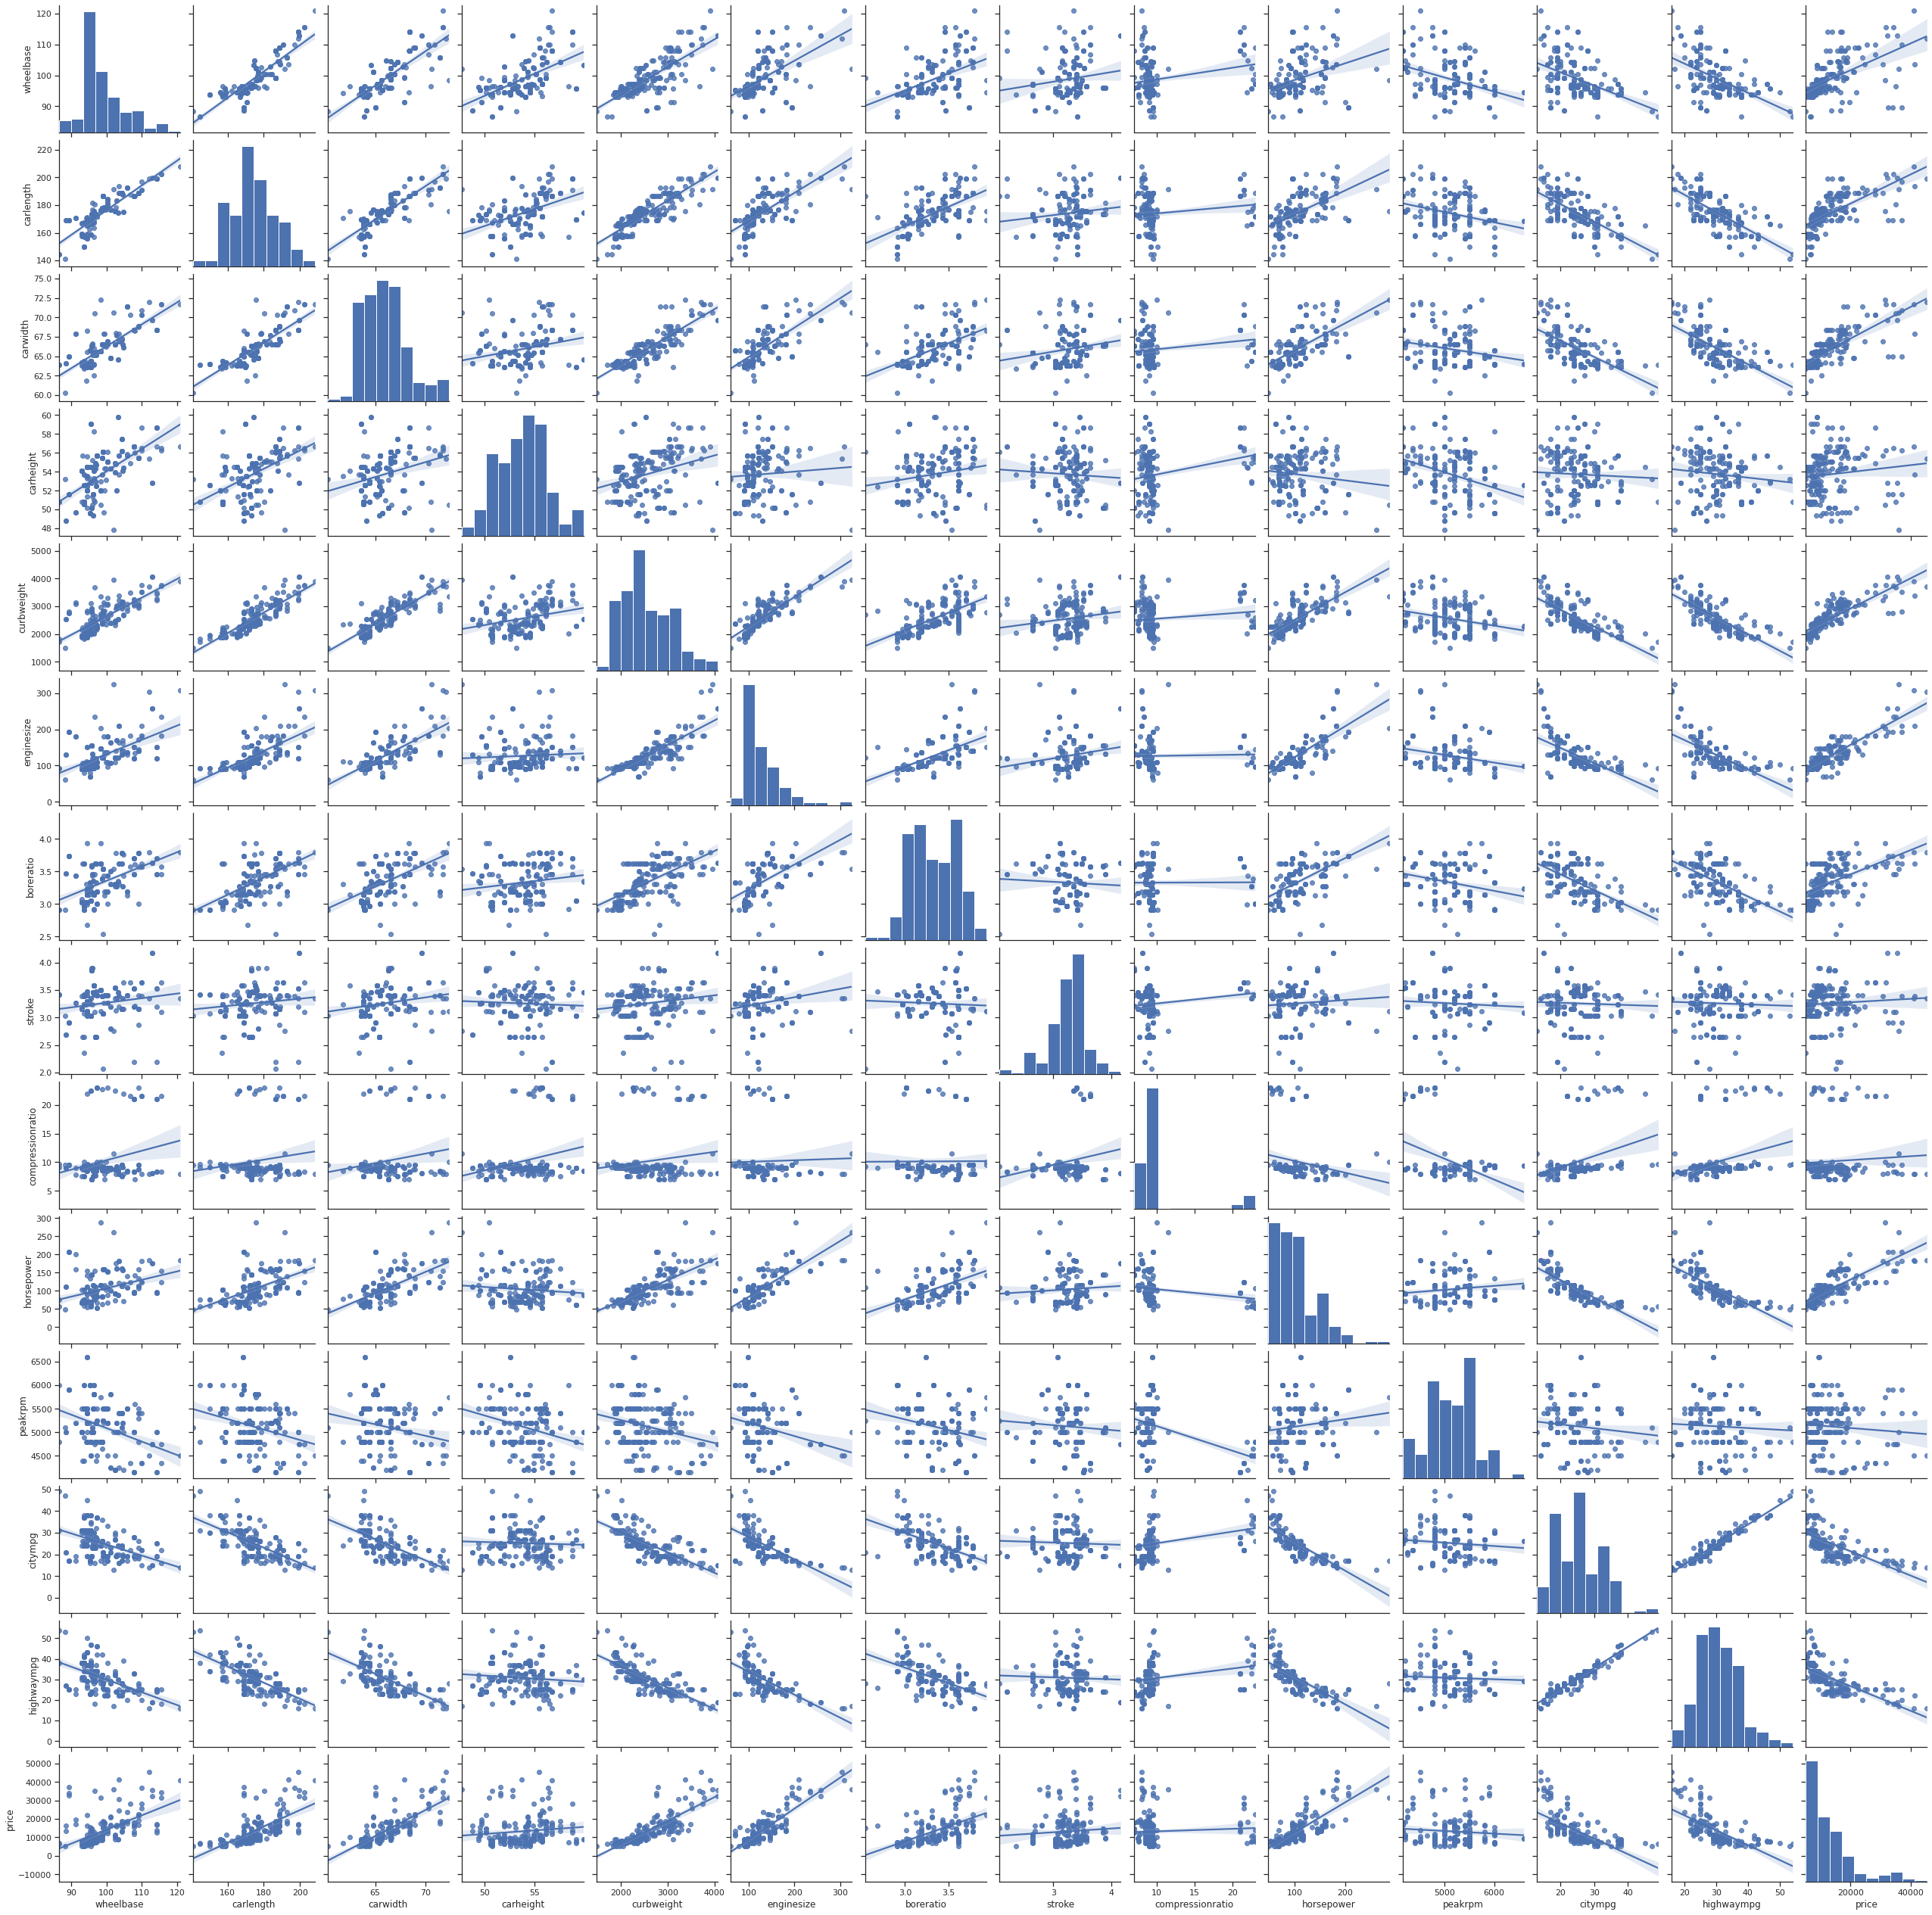

CPU times: user 1min 19s, sys: 18.5 s, total: 1min 38s
Wall time: 1min 16s


In [195]:
# Make a paiwise scatter plot.
%%time
plt.figure(figsize=(20, 10))
sns.set(style="ticks", color_codes=True)
sns.pairplot(cars_numeric, kind="reg")
plt.show()

In [196]:
# Display correlation matrix
cor = cars_numeric.corr()
cor

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


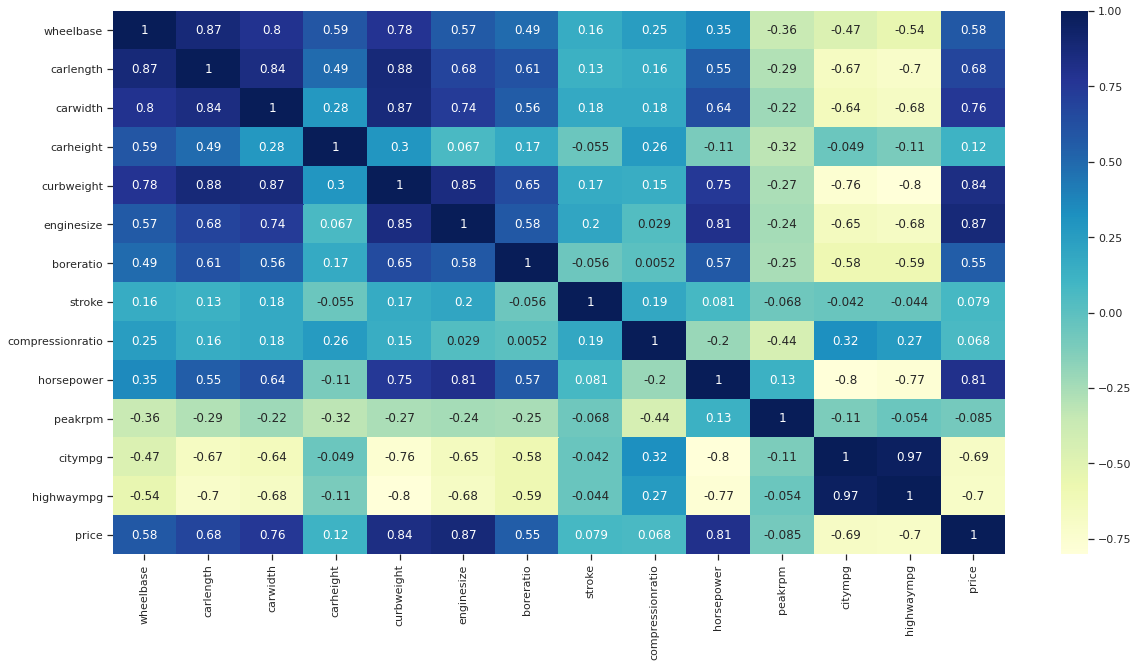

In [197]:
# Plot correlations on a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [0]:
# Convert symboling data type from object to categorical.
cars['symboling'] = cars['symboling'].astype('object')

In [199]:
# Print the company name.
cars['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

### **Data Clearance**

In [200]:
# Extract the car name.
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [201]:
# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile(r'\w+-?\w+')
carnames = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
print(carnames)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object


In [0]:
# Add new column, car_company, which is same to the CarName.
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])


In [203]:
cars['car_company'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
maxda           2
renault         2
mercury         1
porcshce        1
toyouta         1
vokswagen       1
Nissan          1
Name: car_company, dtype: int64

In [0]:
# Replace the misspelled company names with the correct company names, then add them to car_company column.

cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'
cars.loc[(cars['car_company'] == "vw") | 
         (cars['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'

In [205]:
cars['car_company'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: car_company, dtype: int64

In [0]:
# Remove CarName column.
cars = cars.drop('CarName', axis=1)

In [207]:
# Print stats.
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### **Data Preparation**

In [0]:
# Split a dataset into X and y.
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]
y = cars['price']

In [209]:
X.select_dtypes(include=['object'])

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo
201,-1,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo
202,-1,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo


In [210]:
# Create a dummy for categorical variable columns.
cars_categorical = X.select_dtypes(include=['object'])
print(cars_categorical.shape)
cars_categorical.head(10)

(205, 11)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
5,2,gas,std,two,sedan,fwd,front,ohc,five,mpfi,audi
6,1,gas,std,four,sedan,fwd,front,ohc,five,mpfi,audi
7,1,gas,std,four,wagon,fwd,front,ohc,five,mpfi,audi
8,1,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi,audi
9,0,gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi,audi


In [211]:
# Convert categorical variable into dummy/indicator variables.
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
print(cars_dummies.shape)
cars_dummies.head(10)

(205, 55)


,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Drop categorical variables from X.
X = X.drop(list(cars_categorical.columns), axis=1)

In [0]:
# Concatenate dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

In [0]:
# Scale the features. Standardize a dataset.
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

In [0]:
# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

### **Regression Model**

In [216]:
%%time
# Specify the list of alpha hyperparameters.
alphas = 10**np.linspace(10,-2,100)*0.5
params = {'alpha': alphas}

# Ridge Regression
ridge = Ridge()

# Set up GridSearchCV() function with the range of hyperparameters.
# Create a KFold object with 10 splits.
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 7.01 s, sys: 5.08 s, total: 12.1 s
Wall time: 6.2 s


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.2s finished


In [217]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
62,0.002819,0.000033,0.001353,0.000101,152.693,{'alpha': 152.69277544167062},-1348.896204,-2251.387195,-2176.819391,-2313.194456,-1663.915501,-1081.604536,-2076.422137,-2414.543390,-1898.669240,-1964.211309,-1918.966336,411.881212,33,-1631.323573,-1561.096660,-1549.345672,-1580.139422,-1587.063220,-1621.871734,-1605.849732,-1538.423900,-1567.898334,-1566.074334,-1580.908658,29.091549
63,0.002821,0.000051,0.001309,0.000030,115.506,{'alpha': 115.5064850041579},-1350.874671,-2113.821195,-2189.361329,-2177.093589,-1556.076650,-1066.304162,-1994.383347,-2350.516145,-1879.123832,-1884.687058,-1856.224198,389.163345,27,-1548.745938,-1481.766116,-1464.586455,-1506.757662,-1499.271016,-1535.036495,-1519.073025,-1458.209629,-1488.681332,-1486.781243,-1498.890891,27.635621
64,0.002819,0.000018,0.001321,0.000038,87.3764,{'alpha': 87.37642000038414},-1345.705885,-1974.949939,-2207.511362,-2051.180116,-1460.948068,-1093.737304,-1934.775050,-2293.923774,-1870.289201,-1801.355564,-1803.437627,366.995918,23,-1476.255858,-1415.932639,-1393.249466,-1441.001104,-1424.984290,-1459.521120,-1436.266583,-1392.781755,-1420.102532,-1417.740002,-1427.783535,25.158265
65,0.002826,0.000044,0.001315,0.000028,66.0971,{'alpha': 66.09705742330144},-1335.029676,-1837.577648,-2214.309021,-1947.221654,-1424.447456,-1117.364819,-1880.363008,-2230.641441,-1855.509153,-1715.063059,-1755.752693,346.495850,19,-1406.525155,-1355.064672,-1333.725885,-1376.474745,-1361.340807,-1387.682202,-1362.097094,-1332.839510,-1361.528232,-1351.428751,-1362.870705,21.573776
66,0.002832,0.000044,0.001318,0.000020,50,{'alpha': 50.0},-1333.982507,-1729.843331,-2206.657953,-1852.483590,-1389.454188,-1152.509302,-1831.479756,-2162.626689,-1833.875185,-1632.057417,-1712.496992,326.080529,16,-1338.838548,-1300.928017,-1278.319107,-1315.961890,-1300.039151,-1322.924927,-1299.409226,-1282.961889,-1311.184710,-1286.253392,-1303.682086,17.968936
67,0.002803,0.000027,0.001308,0.000026,37.8232,{'alpha': 37.823166377731454},-1333.325792,-1636.719896,-2182.967981,-1765.954301,-1359.464893,-1189.725312,-1792.311499,-2091.991954,-1804.877620,-1609.960553,-1676.729980,304.676449,13,-1283.128422,-1251.304793,-1229.217564,-1257.538782,-1243.010098,-1264.982641,-1243.650900,-1241.103945,-1267.772566,-1228.830204,-1251.053991,16.533730
68,0.002809,0.000024,0.001349,0.000056,28.6118,{'alpha': 28.611838296751102},-1330.313879,-1584.097386,-2143.422598,-1687.432163,-1335.460902,-1220.197655,-1757.224167,-2020.944290,-1768.460495,-1614.571239,-1646.212477,282.721704,11,-1235.046252,-1202.908576,-1190.189350,-1207.610097,-1195.190285,-1213.458879,-1194.710848,-1201.648406,-1228.893795,-1177.803936,-1204.746042,16.516951
69,0.002825,0.000031,0.001288,0.000019,21.6438,{'alpha': 21.643806405415308},-1326.626085,-1540.455204,-2089.846309,-1617.193500,-1331.661555,-1257.645246,-1734.613129,-1955.254959,-1725.036656,-1634.868685,-1621.320133,257.753272,8,-1189.343181,-1157.663364,-1157.561657,-1160.716160,-1152.330617,-1167.096588,-1150.835865,-1163.357655,-1191.585010,-1129.246828,-1161.973692,17.267868
70,0.002817,0.000043,0.001305,0.000026,16.3727,{'alpha': 16.372745814388658},-1323.422101,-1518.914330,-2025.234087,-1555.633511,-1352.814029,-1322.766558,-1730.050575,-1897.407264,-1675.452948,-1651.333165,-1605.302857,227.427613,6,-1150.037899,-1118.730180,-1131.133919,-1119.211716,-1112.401244,-1124.181655,-1113.467154,-1127.882824,-1158.726092,-1085.438765,-1124.121145,19.320633
71,0.002849,0

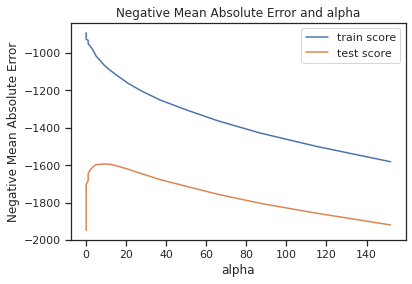

In [218]:
# Plot mean test and train scoes with alpha.
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plot train and test scores.
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [219]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 5.94283834e+02, -8.68178292e+01,  1.13770470e+03, -2.05255645e+02,
        1.10416760e+03,  1.49986818e+03, -2.40077828e+02, -2.49000668e+02,
       -6.37410897e+01,  8.35582453e+02,  1.31766419e+02, -3.15388540e+02,
       -1.20970849e+02,  5.40937525e+01,  2.95855373e+02,  1.07169496e+02,
        1.47511971e+02,  1.75450079e+02, -8.78880774e+01,  5.14035178e+02,
       -8.32417879e+01, -4.86037872e+02, -5.91244481e+02, -4.81371587e+02,
       -5.39237171e+02, -2.16586427e+02,  4.64571247e+02,  1.11813404e+03,
        0.00000000e+00, -3.20465647e+02,  2.04195480e+02,  7.44006302e+01,
       -3.15853624e+02,  1.25395594e+02, -6.96202437e+02, -6.71331854e+02,
       -1.12267209e+02, -1.23127714e-28, -1.08387375e+02,  1.25395594e+02,
        1.60486593e+02, -1.00630662e+02,  8.78880774e+01, -7.13134818e+01,
        1.63400433e+02, -1.60607255e+02,  7.89610085e+01,  2.09693472e+02,
        1.03835912e+03,  1.50582709e+03, -1.17518768e+02, -3.86293939e+02,
       -1.24833276e+02, -

In [220]:
%%time
y_pred_ridge = ridge.fit(X_train, y_train).predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
print(ridge)
print("r^2 on test data : %f" % r2_score_ridge)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
r^2 on test data : 0.886935
CPU times: user 4.68 ms, sys: 1.93 ms, total: 6.61 ms
Wall time: 5.12 ms


In [221]:
%%time
# Specify the list of alpha hyperparameters.
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Lasso Regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

# Hide warnings if needed.
import warnings
warnings.filterwarnings('ignore')

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 2.94 s, sys: 74.1 ms, total: 3.01 s
Wall time: 2.93 s


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    2.9s finished


In [222]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.014105,0.003302,0.001291,0.000260,0.0001,{'alpha': 0.0001},-1670.179423,-2233.292891,-1683.787910,-2417.184900,-2087.049781,-1954.675497,-2147.172141,-1720.649349,-1265.549605,-1725.955213,-1890.549671,322.690733,27,-919.335523,-873.279620,-918.392340,-858.339134,-878.448931,-857.125625,-898.114825,-886.419434,-952.294831,-890.728324,-893.247859,28.314647
1,0.011342,0.001364,0.001065,0.000114,0.001,{'alpha': 0.001},-1670.147506,-2233.099024,-1682.161606,-2417.284483,-2086.956797,-1954.650068,-2147.132076,-1720.617576,-1264.396543,-1725.957433,-1890.240311,323.008634,26,-919.339863,-873.290076,-918.395845,-858.339372,-878.447925,-857.127057,-898.114375,-886.420996,-952.300647,-890.724478,-893.250063,28.315664
2,0.010014,0.000616,0.000999,0.000043,0.01,{'alpha': 0.01},-1669.824345,-2231.166378,-1678.941981,-2418.280334,-2086.027269,-1954.396202,-2146.731429,-1720.294065,-1252.863497,-1725.980558,-1888.450606,325.361860,25,-919.384834,-873.395492,-918.431581,-858.341752,-878.437862,-857.141387,-898.112139,-886.438762,-952.358904,-890.686063,-893.272878,28.326003
3,0.010547,0.001236,0.001052,0.000185,0.05,{'alpha': 0.05},-1668.413884,-2222.701229,-1678.056645,-2422.702063,-2081.728586,-1953.276659,-2144.877245,-1718.942051,-1250.325976,-1726.096321,-1886.712066,325.485510,24,-919.595906,-873.856965,-918.707336,-858.371794,-878.410401,-857.227403,-898.101635,-886.538610,-952.658204,-890.518602,-893.398686,28.386191
4,0.010167,0.000596,0.001049,0.000149,0.1,{'alpha': 0.1},-1666.662236,-2212.313213,-1676.261034,-2428.181314,-2076.386846,-1951.820144,-2142.646636,-1717.464995,-1256.391736,-1726.336005,-1885.446416,323.927068,23,-919.887513,-874.425647,-919.105832,-858.407294,-878.380986,-857.342859,-898.091802,-886.647287,-953.068574,-890.330074,-893.568787,28.477486
5,0.010033,0.000532,0.000989,0.000018,0.2,{'alpha': 0.2},-1663.500740,-2191.917204,-1674.289397,-2438.794708,-2063.897815,-1949.001455,-2136.949829,-1714.157642,-1229.592977,-1726.923370,-1878.902514,328.220789,22,-920.492597,-875.662018,-919.918397,-858.551061,-878.271461,-857.579410,-898.108753,-886.868703,-953.822377,-889.942390,-893.921717,28.641287
6,0.010043,0.000766,0.000994,0.000035,0.3,{'alpha': 0.3},-1660.158970,-2172.019571,-1673.208478,-2449.401226,-2052.813507,-1946.467602,-2131.680192,-1711.160929,-1206.472236,-1726.740055,-1873.012277,332.168327,21,-921.080152,-877.112563,-920.671331,-858.697003,-878.312187,-857.824343,-898.238355,-887.118059,-954.683638,-889.706862,-894.344449,28.802848
7,0.010699,0.001574,0.001099,0.000231,0.4,{'alpha': 0.4},-1656.797582,-2152.720222,-1672.049154,-2460.024900,-2043.627221,-1944.422525,-2127.354686,-1708.105795,-1212.452701,-1726.893983,-1870.444877,330.707123,20,-921.666276,-878.541787,-921.434786,-858.843202,-878.658146,-858.042209,-898.449781,-887.356938,-955.518769,-889.490100,-894.800199,28.954806
8,0.010401,0.001049,0.001077,0.000162,0.5,{'alpha': 0.5},-1653.382618,-2134.373905,-1670.947625,-2469.299889,-2034.326994,-1941.827185,-2122.704088,-1705.183254,-1216.332759,-1726.867841,-1867.524616,329.619732,19,-922.247870,-879.947205,-922.200100,-859.160430,-879.353438,-858.414009,-898.736030,-887.594409,-956.311960,-889.301342,-895.326679,29.044909
9,0.009921,0.000419,0.000980,0.000024,0.6,{'alpha': 0.6},-1650.020067,-2117.536127,-1669.752042,-2477.788801,-2024.903631,-1939.714267,-2118.036177,-1702.678248,-1222.556419,-1725.753824,-1864.873960,328.218356,18,-922.825795,-881.309104,-922.966442,-859

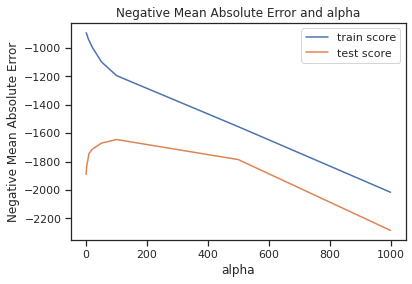

In [223]:
# Plot mean test and train scoes with alpha.
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# # Plot train and test scores.
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [224]:
alpha =100
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  1.35162507e+03, -0.00000000e+00,
        1.56960832e+03,  1.28251489e+03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  9.41297049e+02,  1.05727912e+02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.34643337e+01, -0.00000000e+00,  1.90422275e+02,
       -0.00000000e+00, -2.79431758e+02, -1.31611913e+02,  0.00000000e+00,
       -2.56790041e+02, -0.00000000e+00,  5.17031613e+02,  1.96108639e+03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -1.86933604e+01,  2.10469154e+02, -1.39245653e+02, -2.36992743e+02,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  6.53317486e-01,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -5.10467700e+01,
        1.55648565e+02, -7.41817773e+01, -0.00000000e+00,  1.36333855e+02,
        1.40134766e+03,  1.59464168e+03,  0.00000000e+00, -5.13081145e+01,
        0.00000000e+00, -

In [225]:
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.880019


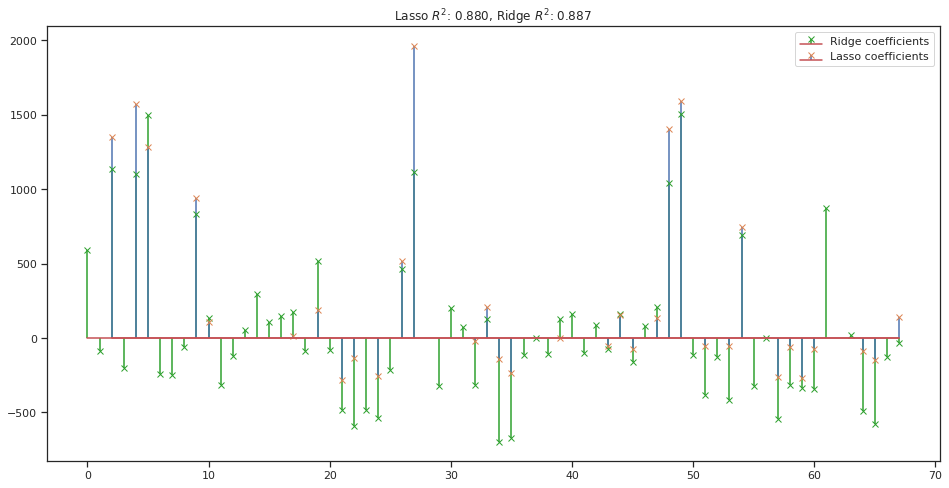

In [226]:
plt.figure(figsize=(16,8))
m, s, _ = plt.stem(np.where(ridge.coef_)[0], ridge.coef_[ridge.coef_ != 0],
                   markerfmt='x', label='Ridge coefficients',
                   use_line_collection=True)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients',
                   use_line_collection=True)
plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f, Ridge $R^2$: %.3f"
          % (r2_score_lasso, r2_score_ridge))
plt.show()